<a href="https://colab.research.google.com/github/svfabi/Fabiano/blob/master/Ajustado_Formula_Aproxima%C3%A7%C3%A3osomatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

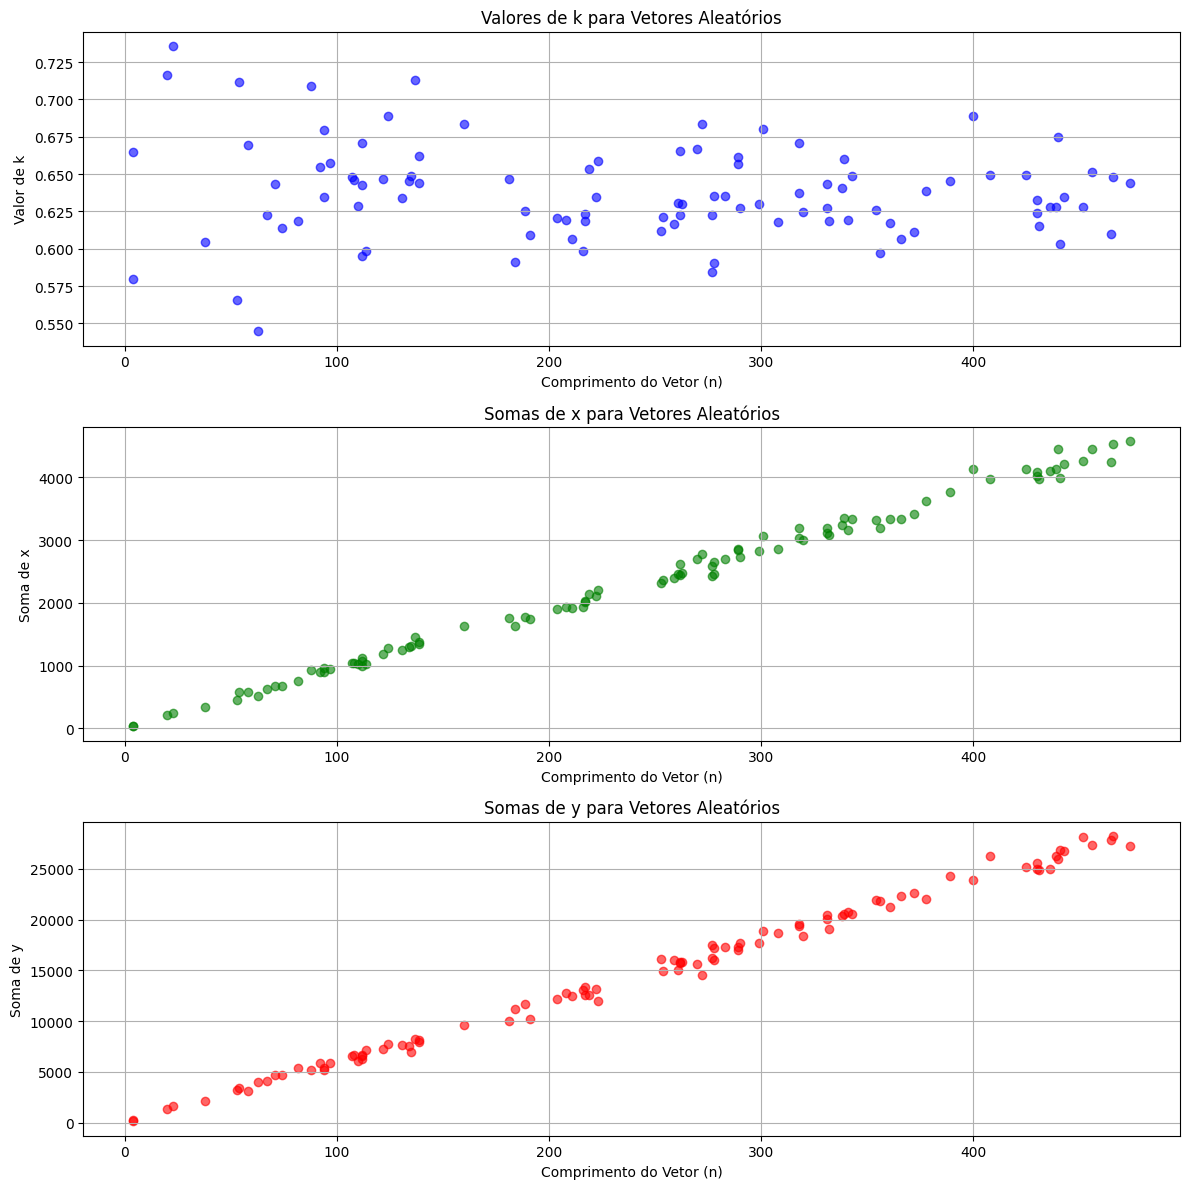

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# codigo para encontrar  uma função que aproxime valores de sumxy de sumxsumy
# gera vetores de tamanhos e valores aleatorios e verica o valor de K
# k proximos de 1 a função é a melhor para representar a aproximação
# da função para todos os valores de comprimento de vetor e seus valores xi e yi

def calcular_k(x, y):
    n = len(x)
    mediax = 15
    sum_x_Calcu = np.sum(x)/n
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)

    # Corrected the formula for k: multiplying sum_xy by (n-1)
    k = (sum_x * sum_y) / (sum_xy + mediax* sum_y * (n - 1))

    return k, sum_x, sum_y

# Gerar vetores aleatórios e calcular k
n_vetores = 100 #numero maximo de vetores gerados aleatoriamente
n_Len_Vetor = 500 #comprimento maximo do vetor gerado aleatoriamente
n_Valoresx = 20 # numero maximo dos valores de xi e yi
n_Valoresy = 120 # numero maximo dos valores de xi e yi
comprimentos = np.random.randint(2, n_Len_Vetor, n_vetores)
ks = []
somas_x = []
somas_y = []

for n in comprimentos:
    x = np.random.randint(0, n_Valoresx, n)
    y = np.random.randint(0, n_Valoresy, n)
    k, sum_x, sum_y = calcular_k(x, y)
    ks.append(k)
    somas_x.append(sum_x)
    somas_y.append(sum_y)

# Plotar os resultados
plt.figure(figsize=(12, 12))

# Gráfico de k
plt.subplot(3, 1, 1)
plt.scatter(comprimentos, ks, color='blue', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Valor de k')
plt.title('Valores de k para Vetores Aleatórios')
plt.grid(True)

# Gráfico de somas_x
plt.subplot(3, 1, 2)
plt.scatter(comprimentos, somas_x, color='green', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de x')
plt.title('Somas de x para Vetores Aleatórios')
plt.grid(True)

# Gráfico de somas_y
plt.subplot(3, 1, 3)
plt.scatter(comprimentos, somas_y, color='red', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de y')
plt.title('Somas de y para Vetores Aleatórios')
plt.grid(True)

plt.tight_layout()
plt.show()